# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from pandas.api.types import CategoricalDtype

MIN_NUM_GEO_VAL = 4
PERCENT_ENTITY_NULL = 0.8

In [2]:
dtype = {"geo_value":"str"}
df = pd.read_csv("validation_dataset.csv", dtype=dtype)

display(df.head(3))
print("Shape: ", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
0,2021-01-30,1000,35.751251,12.192174,2.377949,59.319496,71.761460,22.950414,53.824192,32.711292,34.336183,60.719966,1.805022,10.612720,33.039695,19.788394,6.975542,24.353057,86.25466,11.855544
1,2021-01-30,1003,34.893812,10.300586,1.193659,66.346347,66.544064,24.835334,57.072226,NaN,32.608539,56.085422,1.096439,6.710337,31.319709,24.900773,9.748828,29.177645,85.12011,13.447919
2,2021-01-30,1055,39.784669,NaN,4.758050,NaN,NaN,NaN,60.837661,NaN,44.050046,NaN,0.826949,NaN,NaN,17.217705,NaN,NaN,NaN,13.700210


Shape:  (4653, 20)


### Data Format

In [3]:
# Inconsistant geo_value (4 digits) -> drop
# Insufficient geo_value (ending with 000) -> drop
df['count_geo_value'] = df['geo_value'].apply(lambda x : len(x))
df = df[df['count_geo_value']==5].reset_index(drop = True)
df = df[~df['geo_value'].str.contains(r'000$', regex=True)]
df = df.drop(columns = {'count_geo_value'})

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
0,2021-01-30,10001,32.058222,16.388572,2.760288,71.190606,67.951268,27.628605,61.100831,NaN,39.865526,90.530119,0.249968,22.323680,29.247650,11.841485,8.860422,30.097123,96.330866,10.431381
1,2021-01-30,10003,25.479899,23.334497,3.048564,82.478212,71.201928,33.301738,46.579930,8.945387,25.327464,92.575809,0.545075,17.100805,37.804224,13.246671,11.817610,37.699941,95.450025,6.584710
2,2021-01-30,10005,29.801031,15.932784,0.338100,78.821349,71.577289,33.363128,59.938583,NaN,31.034715,93.705314,0.000000,18.683728,33.250053,17.217523,9.697537,31.747247,95.524225,4.033529
3,2021-01-30,11001,23.040497,13.932603,9.457849,86.330856,76.859203,47.234664,40.245858,NaN,15.263872,94.982730,0.417562,15.513196,38.044878,7.919156,14.503277,47.686792,97.201599,2.933867
5,2021-01-30,12001,29.518199,13.130872,3.278188,79.621890,69.527648,31.159032,56.195953,NaN,39.270637,76.027254,0.672081,24.170952,27.794356,15.672880,7.643028,37.323119,95.514082,5.971942


Shape : (3732, 20)


In [4]:
dtype = {"FIPS State":str, "FIPS County":str}
df_fips = pd.read_excel(r"US_FIPS_Codes.xlsx", dtype=dtype)
df_fips['geo_value'] = df_fips['FIPS State'] + df_fips['FIPS County']
df_fips = df_fips.drop(columns = {"FIPS State",'FIPS County'})

display(df_fips.head())
print("Shape :", df_fips.shape)

,State,County Name,geo_value
0,Alabama,Autauga,01001
1,Alabama,Baldwin,01003
2,Alabama,Barbour,01005
3,Alabama,Bibb,01007
4,Alabama,Blount,01009


Shape : (3142, 3)


In [5]:
df.merge(df_fips, on='geo_value', how='left').isnull().sum()

time_value                                 0
geo_value                                  0
smoothed_wspent_time_1d                  178
smoothed_wtested_14d                     144
smoothed_wpublic_transit_1d              178
smoothed_wcovid_vaccinated_or_accept     200
smoothed_wworried_become_ill             443
smoothed_wvaccine_likely_govt_health     846
smoothed_wshop_1d                        178
smoothed_wtested_positive_14d           3463
smoothed_wwork_outside_home_1d           178
smoothed_wothers_masked                  537
smoothed_wcli                              0
smoothed_wcovid_vaccinated               167
smoothed_wvaccine_likely_friends         852
smoothed_wrestaurant_1d                  178
smoothed_wvaccine_likely_politicians     872
smoothed_wvaccine_likely_who             850
smoothed_wwearing_mask                   473
smoothed_wlarge_event_1d                 178
State                                      0
County Name                                0
dtype: int

In [6]:
df = df.merge(df_fips, on='geo_value', how='left')

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,...,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name
0,2021-01-30,10001,32.058222,16.388572,2.760288,71.190606,67.951268,27.628605,61.100831,NaN,...,0.249968,22.323680,29.247650,11.841485,8.860422,30.097123,96.330866,10.431381,Delaware,Kent
1,2021-01-30,10003,25.479899,23.334497,3.048564,82.478212,71.201928,33.301738,46.579930,8.945387,...,0.545075,17.100805,37.804224,13.246671,11.817610,37.699941,95.450025,6.584710,Delaware,New Castle
2,2021-01-30,10005,29.801031,15.932784,0.338100,78.821349,71.577289,33.363128,59.938583,NaN,...,0.000000,18.683728,33.250053,17.217523,9.697537,31.747247,95.524225,4.033529,Delaware,Sussex
3,2021-01-30,11001,23.040497,13.932603,9.457849,86.330856,76.859203,47.234664,40.245858,NaN,...,0.417562,15.513196,38.044878,7.919156,14.503277,47.686792,97.201599,2.933867,District of Columbia,District of Columbia
4,2021-01-30,12001,29.518199,13.130872,3.278188,79.621890,69.527648,31.159032,56.195953,NaN,...,0.672081,24.170952,27.794356,15.672880,7.643028,37.323119,95.514082,5.971942,Florida,Alachua


Shape : (3732, 22)


In [7]:
# Find the largest mode
df_num_time_by_geo = df.groupby(['geo_value']).agg({"time_value":"nunique"})
mode_number_of_recode = statistics.multimode(df_num_time_by_geo['time_value'])
max_mode_number_of_recode = max(mode_number_of_recode)
display(df_num_time_by_geo[df_num_time_by_geo['time_value']<max_mode_number_of_recode])

,time_value
geo_value,
12023,1
12131,5
13139,2
13185,5
13223,4
...,...
54081,5
55027,3
55055,1


In [8]:
list_remove_geo_value = list(df_num_time_by_geo[df_num_time_by_geo['time_value']!=max_mode_number_of_recode].index)
list_remove_geo_value[:5]

['12023', '12131', '13139', '13185', '13223']

In [9]:
df = df[~df['geo_value'].isin(list_remove_geo_value)].reset_index(drop = True)

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,...,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name
0,2021-01-30,10001,32.058222,16.388572,2.760288,71.190606,67.951268,27.628605,61.100831,NaN,...,0.249968,22.323680,29.247650,11.841485,8.860422,30.097123,96.330866,10.431381,Delaware,Kent
1,2021-01-30,10003,25.479899,23.334497,3.048564,82.478212,71.201928,33.301738,46.579930,8.945387,...,0.545075,17.100805,37.804224,13.246671,11.817610,37.699941,95.450025,6.584710,Delaware,New Castle
2,2021-01-30,10005,29.801031,15.932784,0.338100,78.821349,71.577289,33.363128,59.938583,NaN,...,0.000000,18.683728,33.250053,17.217523,9.697537,31.747247,95.524225,4.033529,Delaware,Sussex
3,2021-01-30,11001,23.040497,13.932603,9.457849,86.330856,76.859203,47.234664,40.245858,NaN,...,0.417562,15.513196,38.044878,7.919156,14.503277,47.686792,97.201599,2.933867,District of Columbia,District of Columbia
4,2021-01-30,12001,29.518199,13.130872,3.278188,79.621890,69.527648,31.159032,56.195953,NaN,...,0.672081,24.170952,27.794356,15.672880,7.643028,37.323119,95.514082,5.971942,Florida,Alachua


Shape : (3444, 22)


In [10]:
df.groupby(['geo_value']).agg({"time_value":"nunique"})[df.groupby(['geo_value']).agg({"time_value":"nunique"})['time_value']!=37]

,time_value
geo_value,
10001,7
10003,7
10005,7
11001,7
12001,7
...,...
55101,7
55105,7
55133,7


In [11]:
df.groupby(['State','County Name']).agg({"time_value":"nunique"}).head(20)

time_value
State                County Name                     
Delaware             Kent                           7
                     New Castle                     7
                     Sussex                         7
District of Columbia District of Columbia           7
Florida              Alachua                        7
                     Bay                            7
                     Brevard                        7
                     Broward                        7
                     Charlotte                      7
                     Citrus                         7
                     Clay                           7
                     Collier                        7
                     Duval                          7
                     Escambia                       7
                     Flagler                        7
                     Hernando                       7
                     Hillsborough                   7
                     Indian River                   7
                     Lake                           7
                     Lee                            7

### Data Type

In [12]:
df['time_value'] = pd.to_datetime(df['time_value'], errors='coerce')

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,...,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name
0,2021-01-30,10001,32.058222,16.388572,2.760288,71.190606,67.951268,27.628605,61.100831,NaN,...,0.249968,22.323680,29.247650,11.841485,8.860422,30.097123,96.330866,10.431381,Delaware,Kent
1,2021-01-30,10003,25.479899,23.334497,3.048564,82.478212,71.201928,33.301738,46.579930,8.945387,...,0.545075,17.100805,37.804224,13.246671,11.817610,37.699941,95.450025,6.584710,Delaware,New Castle
2,2021-01-30,10005,29.801031,15.932784,0.338100,78.821349,71.577289,33.363128,59.938583,NaN,...,0.000000,18.683728,33.250053,17.217523,9.697537,31.747247,95.524225,4.033529,Delaware,Sussex
3,2021-01-30,11001,23.040497,13.932603,9.457849,86.330856,76.859203,47.234664,40.245858,NaN,...,0.417562,15.513196,38.044878,7.919156,14.503277,47.686792,97.201599,2.933867,District of Columbia,District of Columbia
4,2021-01-30,12001,29.518199,13.130872,3.278188,79.621890,69.527648,31.159032,56.195953,NaN,...,0.672081,24.170952,27.794356,15.672880,7.643028,37.323119,95.514082,5.971942,Florida,Alachua


Shape : (3444, 22)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3444 entries, 0 to 3443
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   time_value                            3444 non-null   datetime64[ns]
 1   geo_value                             3444 non-null   object        
 2   smoothed_wspent_time_1d               3383 non-null   float64       
 3   smoothed_wtested_14d                  3419 non-null   float64       
 4   smoothed_wpublic_transit_1d           3383 non-null   float64       
 5   smoothed_wcovid_vaccinated_or_accept  3403 non-null   float64       
 6   smoothed_wworried_become_ill          3254 non-null   float64       
 7   smoothed_wvaccine_likely_govt_health  2884 non-null   float64       
 8   smoothed_wshop_1d                     3383 non-null   float64       
 9   smoothed_wtested_positive_14d         269 non-null    float64       
 10  

### Outlier

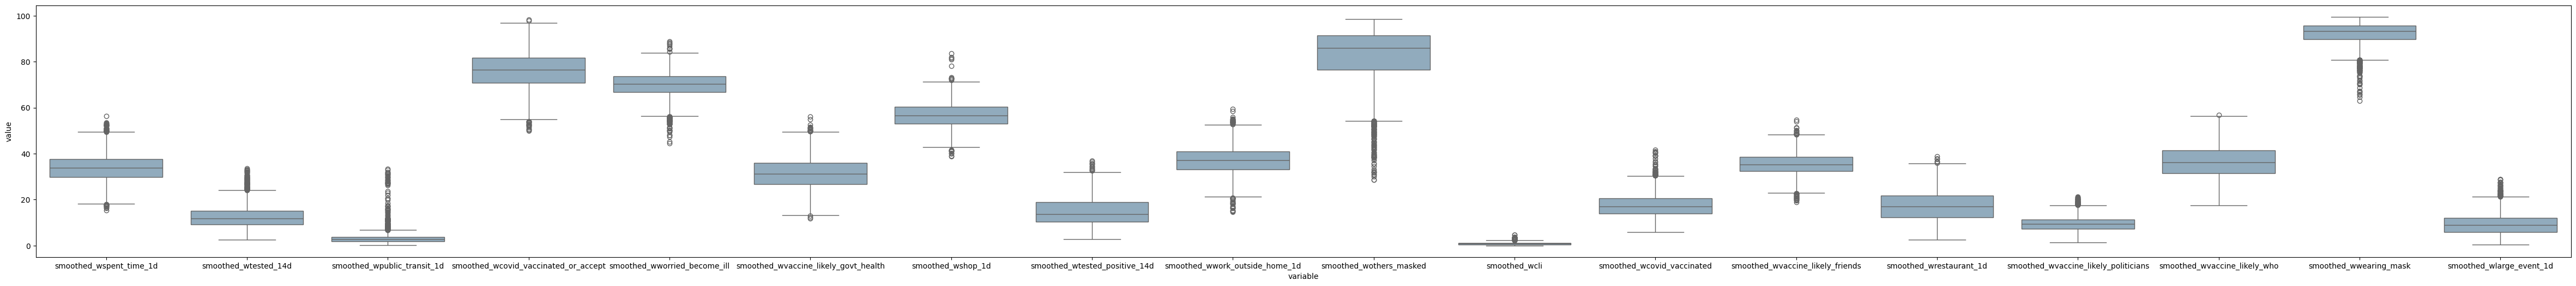

In [14]:
sns.set_palette("twilight")
plt.figure(figsize=(60, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(df.drop(columns = {'time_value','geo_value','State','County Name'})), whis=1.5)

plt.show()

In [15]:
list_feature = []
list_geo_val = []
WINDOW = 5
for a_col in list(df.columns):
    if a_col not in ['time_value','geo_value','State','County Name'
                     ,'day_of_week','rolling_mean','rolling_std','z_score','is_outlier'
                     ,'smoothed_wtested_14d'
                     ]:
        df['rolling_mean'] = (df.groupby('geo_value')[a_col].rolling(window=WINDOW, center=True).mean().reset_index(level=0, drop=True))
        df['rolling_std'] = (df.groupby('geo_value')[a_col].rolling(window=WINDOW, center=True).std().reset_index(level=0, drop=True))
        df['z_score'] = (df[a_col] - df['rolling_mean']) / df['rolling_std']
        df['is_outlier'] = df['z_score'].abs() > 1.96
        if df[df['is_outlier']==True]['geo_value'].nunique() != 0:
            for a_geo_val in df[df['is_outlier']==True]['geo_value'].unique():
                list_feature.append(a_col)
                list_geo_val.append(a_geo_val)
df = df.drop(columns = {"rolling_mean","rolling_std","z_score","is_outlier"})

In [16]:
dict_result = {'geo_val':list_geo_val, 'feature':list_feature}
df_result = pd.DataFrame(dict_result)
df_result

,geo_val,feature


In [17]:
list_feature = []
list_geo_val = []
WINDOW = 3
for a_col in list(df.columns):
    if a_col not in ['time_value','geo_value','State','County Name'
                     ,'day_of_week','rolling_mean','rolling_std','z_score','is_outlier'
                     ,'smoothed_wtested_14d'
                     ]:
        df['rolling_mean'] = (df.groupby('geo_value')[a_col].rolling(window=WINDOW, center=True).mean().reset_index(level=0, drop=True))
        df['rolling_std'] = (df.groupby('geo_value')[a_col].rolling(window=WINDOW, center=True).std().reset_index(level=0, drop=True))
        df['z_score'] = (df[a_col] - df['rolling_mean']) / df['rolling_std']
        df['is_outlier'] = df['z_score'].abs() > 1.96
        if df[df['is_outlier']==True]['geo_value'].nunique() != 0:
            for a_geo_val in df[df['is_outlier']==True]['geo_value'].unique():
                list_feature.append(a_col)
                list_geo_val.append(a_geo_val)
df = df.drop(columns = {"rolling_mean","rolling_std","z_score","is_outlier"})

In [18]:
dict_result = {'geo_val':list_geo_val, 'feature':list_feature}
df_result = pd.DataFrame(dict_result)
df_result

,geo_val,feature


### Distribution

In [19]:
list_skew_cols = []
for a_col in df.drop(columns = {'time_value','geo_value','State','County Name'}).columns:
    skew_val = df['%s'%a_col].skew()
    # print("%s: %s"%(a_col,skew_val))
    if (skew_val > 1) | (skew_val < -1):
        list_skew_cols.append(a_col)
list_skew_cols

['smoothed_wtested_14d',
 'smoothed_wpublic_transit_1d',
 'smoothed_wothers_masked',
 'smoothed_wcli',
 'smoothed_wwearing_mask']

### Time Series Plot

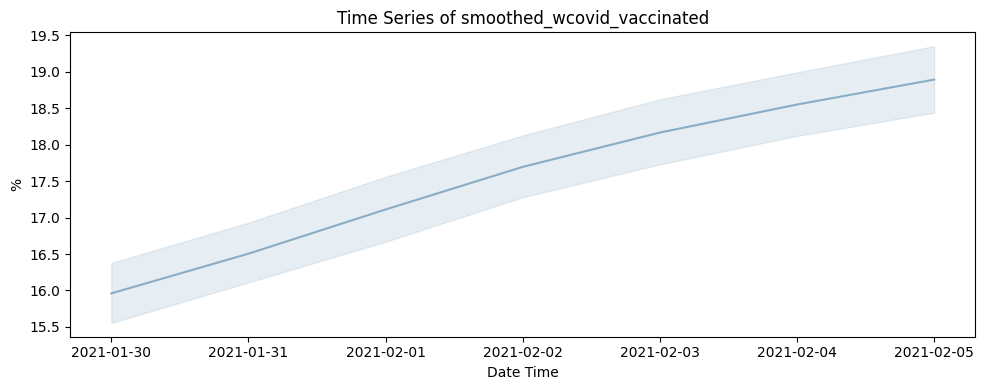

In [20]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='time_value', y='smoothed_wcovid_vaccinated', data=df)
plt.title('Time Series of smoothed_wcovid_vaccinated')
plt.xlabel('Date Time')
plt.ylabel('%')
plt.tight_layout()
plt.show()

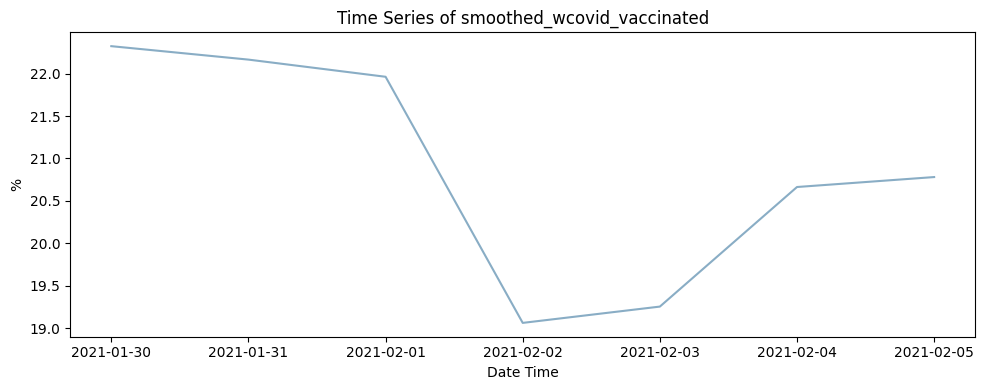

In [21]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='time_value', y='smoothed_wcovid_vaccinated', data=df[df['geo_value']=='10001'])
plt.title('Time Series of smoothed_wcovid_vaccinated')
plt.xlabel('Date Time')
plt.ylabel('%')
plt.tight_layout()
plt.show()

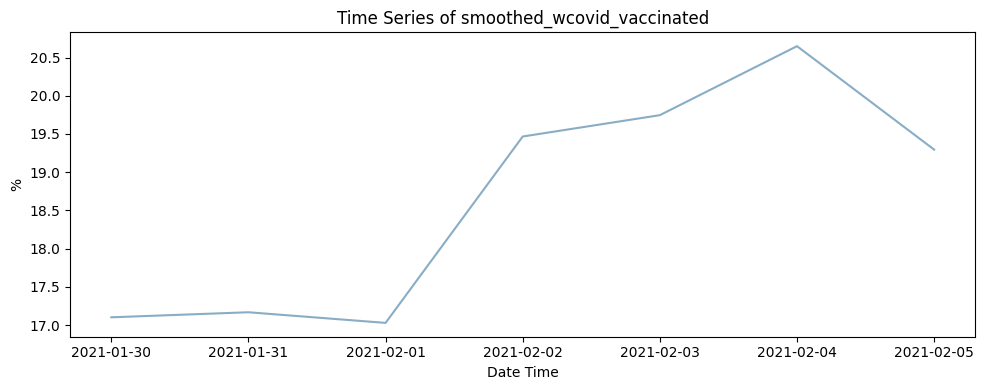

In [22]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='time_value', y='smoothed_wcovid_vaccinated', data=df[df['geo_value']=='10003'])
plt.title('Time Series of smoothed_wcovid_vaccinated')
plt.xlabel('Date Time')
plt.ylabel('%')
plt.tight_layout()
plt.show()

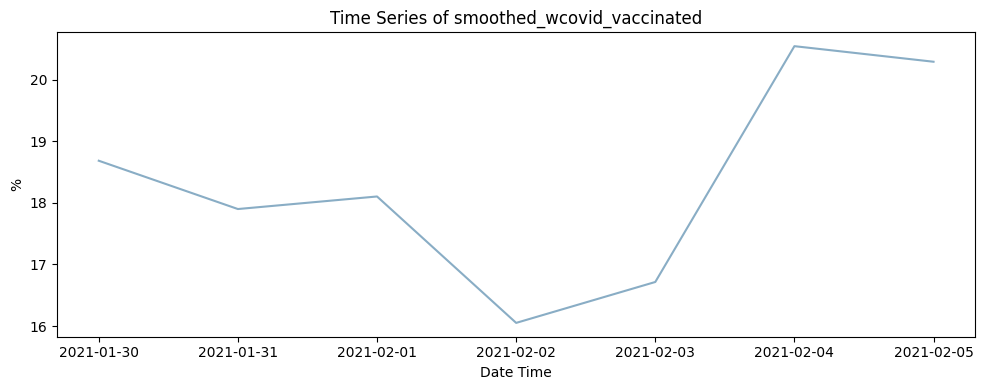

In [23]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='time_value', y='smoothed_wcovid_vaccinated', data=df[df['geo_value']=='10005'])
plt.title('Time Series of smoothed_wcovid_vaccinated')
plt.xlabel('Date Time')
plt.ylabel('%')
plt.tight_layout()
plt.show()

### Week of the day analysis

In [24]:
df['day_of_week'] = df['time_value'].apply(lambda x : x.strftime("%A"))

In [25]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_type = CategoricalDtype(categories=days_order, ordered=True)
df['day_of_week'] = df['day_of_week'].astype(day_type)

# Observed False: Include all categories, even if some are not present in the data.
df_grp_dow = df.groupby('day_of_week', observed=False).agg({'smoothed_wcovid_vaccinated':'mean'}).reset_index()
df_grp_dow

,day_of_week,smoothed_wcovid_vaccinated
0,Monday,17.110652
1,Tuesday,17.694896
2,Wednesday,18.165479
3,Thursday,18.549920
4,Friday,18.892156
5,Saturday,15.960212
6,Sunday,16.504407


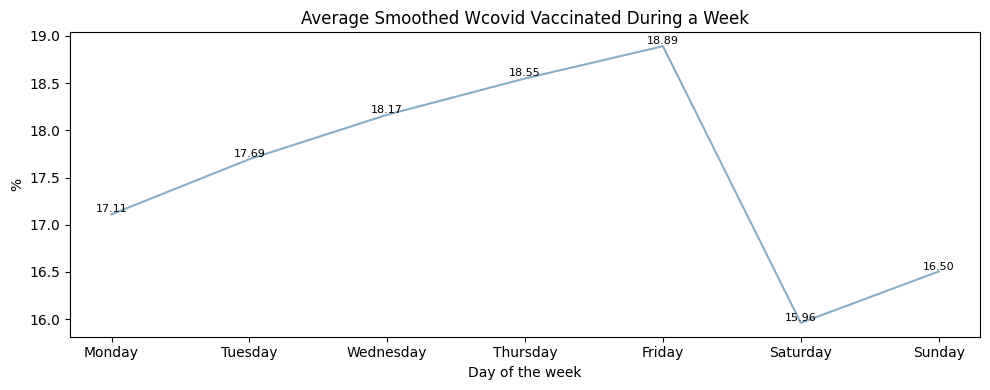

In [26]:
# Plot
plt.figure(figsize=(10, 4))
sns.lineplot(x='day_of_week', y='smoothed_wcovid_vaccinated', data=df_grp_dow)
for i in range(len(df_grp_dow)):
    x = df_grp_dow['day_of_week'].iloc[i]
    y = df_grp_dow['smoothed_wcovid_vaccinated'].iloc[i]
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8)
plt.title('Average Smoothed Wcovid Vaccinated During a Week')
plt.xlabel('Day of the week')
plt.ylabel('%')
plt.tight_layout()
plt.show()

### Null Value

In [27]:
df = df.sort_values(by = ['geo_value','time_value']).reset_index(drop = True)

display(df.head(3))
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,...,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week
0,2021-01-30,10001,32.058222,16.388572,2.760288,71.190606,67.951268,27.628605,61.100831,NaN,...,22.323680,29.247650,11.841485,8.860422,30.097123,96.330866,10.431381,Delaware,Kent,Saturday
1,2021-01-31,10001,33.567386,16.823052,3.810319,68.516498,65.308174,23.597192,66.300500,NaN,...,22.165295,27.032093,13.656526,7.257635,27.500973,95.135350,11.917033,Delaware,Kent,Sunday
2,2021-02-01,10001,33.480379,15.760475,3.721566,68.230689,67.154670,22.022345,64.292646,NaN,...,21.963030,28.219770,12.454998,5.645630,27.786762,94.550634,10.582422,Delaware,Kent,Monday


Shape : (3444, 23)


In [28]:
df_null = pd.DataFrame(df.isnull().sum(), columns=['NULL']).reset_index()
df_null['%NULL'] = df_null['NULL']*100/df.shape[0]
df_null = df_null.sort_values("%NULL", ascending=False)
df_null

,index,NULL,%NULL
9,smoothed_wtested_positive_14d,3175,92.189315
16,smoothed_wvaccine_likely_politicians,586,17.015099
14,smoothed_wvaccine_likely_friends,567,16.463415
17,smoothed_wvaccine_likely_who,564,16.376307
7,smoothed_wvaccine_likely_govt_health,560,16.260163
11,smoothed_wothers_masked,261,7.578397
18,smoothed_wwearing_mask,204,5.923345
6,smoothed_wworried_become_ill,190,5.516841
15,smoothed_wrestaurant_1d,61,1.771196
19,smoothed_wlarge_event_1d,61,1.771196


In [29]:
df = df.drop(columns = {"smoothed_wtested_positive_14d"})
df.isnull().sum()

time_value                                0
geo_value                                 0
smoothed_wspent_time_1d                  61
smoothed_wtested_14d                     25
smoothed_wpublic_transit_1d              61
smoothed_wcovid_vaccinated_or_accept     41
smoothed_wworried_become_ill            190
smoothed_wvaccine_likely_govt_health    560
smoothed_wshop_1d                        61
smoothed_wwork_outside_home_1d           61
smoothed_wothers_masked                 261
smoothed_wcli                             0
smoothed_wcovid_vaccinated               29
smoothed_wvaccine_likely_friends        567
smoothed_wrestaurant_1d                  61
smoothed_wvaccine_likely_politicians    586
smoothed_wvaccine_likely_who            564
smoothed_wwearing_mask                  204
smoothed_wlarge_event_1d                 61
State                                     0
County Name                               0
day_of_week                               0
dtype: int64

In [30]:
df_null_entity = df.drop(columns='geo_value').groupby(df['geo_value']).apply(lambda group: group.isnull().sum()).reset_index()
df_null_entity_melt = pd.melt(df_null_entity, id_vars=['geo_value'], value_vars=[a_col for a_col in df_null_entity if a_col != 'geo_value'], var_name='column_name', value_name='NULL')
df_null_entity_melt['%NULL'] = df_null_entity_melt['NULL'] / df['time_value'].nunique()
df_null_entity_melt

,geo_value,column_name,NULL,%NULL
0,10001,time_value,0,0.0
1,10003,time_value,0,0.0
2,10005,time_value,0,0.0
3,11001,time_value,0,0.0
4,12001,time_value,0,0.0
...,...,...,...,...
10327,55101,day_of_week,0,0.0
10328,55105,day_of_week,0,0.0
10329,55133,day_of_week,0,0.0
10330,55139,day_of_week,0,0.0


In [31]:
list_drop_geo_val = list(df_null_entity_melt[df_null_entity_melt['%NULL']>PERCENT_ENTITY_NULL]['geo_value'].unique())
display(list_drop_geo_val[:10])
print("Len :", len(list_drop_geo_val))

['13151',
 '22063',
 '22109',
 '30013',
 '36117',
 '37071',
 '37125',
 '39003',
 '39157',
 '47113']

Len : 61


In [32]:
df = df[~df['geo_value'].isin(list_drop_geo_val)].reset_index(drop = True)

display(df.head(3))
print("Shape: ", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week
0,2021-01-30,10001,32.058222,16.388572,2.760288,71.190606,67.951268,27.628605,61.100831,39.865526,...,22.323680,29.247650,11.841485,8.860422,30.097123,96.330866,10.431381,Delaware,Kent,Saturday
1,2021-01-31,10001,33.567386,16.823052,3.810319,68.516498,65.308174,23.597192,66.300500,43.130462,...,22.165295,27.032093,13.656526,7.257635,27.500973,95.135350,11.917033,Delaware,Kent,Sunday
2,2021-02-01,10001,33.480379,15.760475,3.721566,68.230689,67.154670,22.022345,64.292646,41.938130,...,21.963030,28.219770,12.454998,5.645630,27.786762,94.550634,10.582422,Delaware,Kent,Monday


Shape:  (3017, 22)


In [33]:
df_null_entity = df.drop(columns='geo_value').groupby(df['geo_value']).apply(lambda group: group.isnull().sum()).reset_index()
df_null_entity_melt = pd.melt(df_null_entity, id_vars=['geo_value'], value_vars=[a_col for a_col in df_null_entity if a_col != 'geo_value'], var_name='column_name', value_name='NULL')
df_null_entity_melt['%NULL'] = df_null_entity_melt['NULL'] / df['time_value'].nunique()
df_null_entity_melt

,geo_value,column_name,NULL,%NULL
0,10001,time_value,0,0.0
1,10003,time_value,0,0.0
2,10005,time_value,0,0.0
3,11001,time_value,0,0.0
4,12001,time_value,0,0.0
...,...,...,...,...
9046,55087,day_of_week,0,0.0
9047,55101,day_of_week,0,0.0
9048,55105,day_of_week,0,0.0
9049,55133,day_of_week,0,0.0


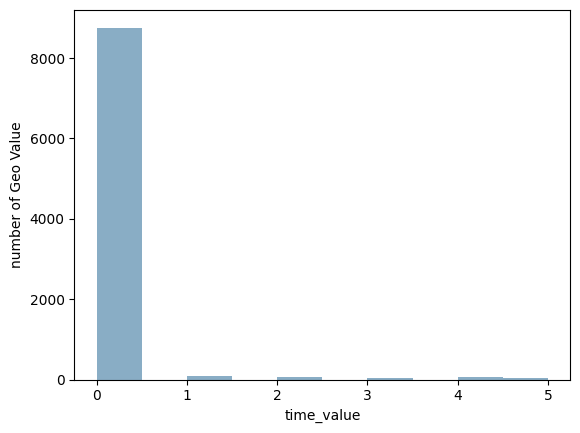

In [34]:
plt.hist(df_null_entity_melt['NULL'])

# Add labels and title
plt.xlabel('time_value')
plt.ylabel('number of Geo Value')

plt.show()

In [35]:
for a_col in df.columns:
    if a_col not in ['time_value','geo_value','State','County Name','day_of_week']:
        df['%s'%a_col] = df.groupby('geo_value')['%s'%a_col].ffill()
df.isnull().sum()

time_value                              0
geo_value                               0
smoothed_wspent_time_1d                 0
smoothed_wtested_14d                    0
smoothed_wpublic_transit_1d             0
smoothed_wcovid_vaccinated_or_accept    0
smoothed_wworried_become_ill            0
smoothed_wvaccine_likely_govt_health    4
smoothed_wshop_1d                       0
smoothed_wwork_outside_home_1d          0
smoothed_wothers_masked                 0
smoothed_wcli                           0
smoothed_wcovid_vaccinated              0
smoothed_wvaccine_likely_friends        6
smoothed_wrestaurant_1d                 0
smoothed_wvaccine_likely_politicians    7
smoothed_wvaccine_likely_who            6
smoothed_wwearing_mask                  0
smoothed_wlarge_event_1d                0
State                                   0
County Name                             0
day_of_week                             0
dtype: int64

In [36]:
df_null_entity = df.drop(columns='geo_value').groupby(df['geo_value']).apply(lambda group: group.isnull().sum()).reset_index()
df_null_entity_melt = pd.melt(df_null_entity, id_vars=['geo_value'], value_vars=[a_col for a_col in df_null_entity if a_col != 'geo_value'], var_name='column_name', value_name='NULL')
df_null_entity_melt['%NULL'] = df_null_entity_melt['NULL'] / df['time_value'].nunique()
df_null_entity_melt

,geo_value,column_name,NULL,%NULL
0,10001,time_value,0,0.0
1,10003,time_value,0,0.0
2,10005,time_value,0,0.0
3,11001,time_value,0,0.0
4,12001,time_value,0,0.0
...,...,...,...,...
9046,55087,day_of_week,0,0.0
9047,55101,day_of_week,0,0.0
9048,55105,day_of_week,0,0.0
9049,55133,day_of_week,0,0.0


In [37]:
df_null_entity_melt[df_null_entity_melt['NULL']>3].sample()

,geo_value,column_name,NULL,%NULL
5484,42085,smoothed_wvaccine_likely_friends,4,0.571429


In [38]:
df[df['geo_value']=='42085'][['time_value','geo_value','smoothed_wvaccine_likely_politicians']]

,time_value,geo_value,smoothed_wvaccine_likely_politicians
2184,2021-01-30,42085,NaN
2185,2021-01-31,42085,NaN
2186,2021-02-01,42085,NaN
2187,2021-02-02,42085,NaN
2188,2021-02-03,42085,5.520223
2189,2021-02-04,42085,6.353144
2190,2021-02-05,42085,6.353144


In [39]:
df = df.dropna()
df.isnull().sum()

time_value                              0
geo_value                               0
smoothed_wspent_time_1d                 0
smoothed_wtested_14d                    0
smoothed_wpublic_transit_1d             0
smoothed_wcovid_vaccinated_or_accept    0
smoothed_wworried_become_ill            0
smoothed_wvaccine_likely_govt_health    0
smoothed_wshop_1d                       0
smoothed_wwork_outside_home_1d          0
smoothed_wothers_masked                 0
smoothed_wcli                           0
smoothed_wcovid_vaccinated              0
smoothed_wvaccine_likely_friends        0
smoothed_wrestaurant_1d                 0
smoothed_wvaccine_likely_politicians    0
smoothed_wvaccine_likely_who            0
smoothed_wwearing_mask                  0
smoothed_wlarge_event_1d                0
State                                   0
County Name                             0
day_of_week                             0
dtype: int64

In [40]:
df['time_value_shift_1'] = df.groupby('geo_value')['time_value'].shift(1)

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week,time_value_shift_1
0,2021-01-30,10001,32.058222,16.388572,2.760288,71.190606,67.951268,27.628605,61.100831,39.865526,...,29.247650,11.841485,8.860422,30.097123,96.330866,10.431381,Delaware,Kent,Saturday,NaT
1,2021-01-31,10001,33.567386,16.823052,3.810319,68.516498,65.308174,23.597192,66.300500,43.130462,...,27.032093,13.656526,7.257635,27.500973,95.135350,11.917033,Delaware,Kent,Sunday,2021-01-30
2,2021-02-01,10001,33.480379,15.760475,3.721566,68.230689,67.154670,22.022345,64.292646,41.938130,...,28.219770,12.454998,5.645630,27.786762,94.550634,10.582422,Delaware,Kent,Monday,2021-01-31
3,2021-02-02,10001,32.242002,16.735176,3.854930,65.747872,67.494766,22.045415,66.438259,44.750377,...,27.766094,12.437546,5.054537,25.036952,94.375488,9.500929,Delaware,Kent,Tuesday,2021-02-01
4,2021-02-03,10001,34.991057,18.797872,9.298927,66.752089,64.805847,26.106294,63.255370,46.075447,...,33.982918,19.815827,4.491494,28.868939,95.239880,8.951449,Delaware,Kent,Wednesday,2021-02-02


Shape : (3010, 23)


In [41]:
df['day_shift'] = df['time_value'] - df['time_value_shift_1']

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week,time_value_shift_1,day_shift
0,2021-01-30,10001,32.058222,16.388572,2.760288,71.190606,67.951268,27.628605,61.100831,39.865526,...,11.841485,8.860422,30.097123,96.330866,10.431381,Delaware,Kent,Saturday,NaT,NaT
1,2021-01-31,10001,33.567386,16.823052,3.810319,68.516498,65.308174,23.597192,66.300500,43.130462,...,13.656526,7.257635,27.500973,95.135350,11.917033,Delaware,Kent,Sunday,2021-01-30,1 days
2,2021-02-01,10001,33.480379,15.760475,3.721566,68.230689,67.154670,22.022345,64.292646,41.938130,...,12.454998,5.645630,27.786762,94.550634,10.582422,Delaware,Kent,Monday,2021-01-31,1 days
3,2021-02-02,10001,32.242002,16.735176,3.854930,65.747872,67.494766,22.045415,66.438259,44.750377,...,12.437546,5.054537,25.036952,94.375488,9.500929,Delaware,Kent,Tuesday,2021-02-01,1 days
4,2021-02-03,10001,34.991057,18.797872,9.298927,66.752089,64.805847,26.106294,63.255370,46.075447,...,19.815827,4.491494,28.868939,95.239880,8.951449,Delaware,Kent,Wednesday,2021-02-02,1 days


Shape : (3010, 24)


In [42]:
df[df['day_shift']>pd.Timedelta(days=1)]

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week,time_value_shift_1,day_shift


In [43]:
df = df.drop(columns = {'time_value_shift_1','day_shift'})

display(df.head())
print("Shape :", df.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week
0,2021-01-30,10001,32.058222,16.388572,2.760288,71.190606,67.951268,27.628605,61.100831,39.865526,...,22.323680,29.247650,11.841485,8.860422,30.097123,96.330866,10.431381,Delaware,Kent,Saturday
1,2021-01-31,10001,33.567386,16.823052,3.810319,68.516498,65.308174,23.597192,66.300500,43.130462,...,22.165295,27.032093,13.656526,7.257635,27.500973,95.135350,11.917033,Delaware,Kent,Sunday
2,2021-02-01,10001,33.480379,15.760475,3.721566,68.230689,67.154670,22.022345,64.292646,41.938130,...,21.963030,28.219770,12.454998,5.645630,27.786762,94.550634,10.582422,Delaware,Kent,Monday
3,2021-02-02,10001,32.242002,16.735176,3.854930,65.747872,67.494766,22.045415,66.438259,44.750377,...,19.062903,27.766094,12.437546,5.054537,25.036952,94.375488,9.500929,Delaware,Kent,Tuesday
4,2021-02-03,10001,34.991057,18.797872,9.298927,66.752089,64.805847,26.106294,63.255370,46.075447,...,19.254920,33.982918,19.815827,4.491494,28.868939,95.239880,8.951449,Delaware,Kent,Wednesday


Shape : (3010, 22)


In [44]:
df.isnull().sum()

time_value                              0
geo_value                               0
smoothed_wspent_time_1d                 0
smoothed_wtested_14d                    0
smoothed_wpublic_transit_1d             0
smoothed_wcovid_vaccinated_or_accept    0
smoothed_wworried_become_ill            0
smoothed_wvaccine_likely_govt_health    0
smoothed_wshop_1d                       0
smoothed_wwork_outside_home_1d          0
smoothed_wothers_masked                 0
smoothed_wcli                           0
smoothed_wcovid_vaccinated              0
smoothed_wvaccine_likely_friends        0
smoothed_wrestaurant_1d                 0
smoothed_wvaccine_likely_politicians    0
smoothed_wvaccine_likely_who            0
smoothed_wwearing_mask                  0
smoothed_wlarge_event_1d                0
State                                   0
County Name                             0
day_of_week                             0
dtype: int64

In [45]:
df.to_pickle("cleaned_validation_dataset.pkl")